# Lab 1 - Data collection, wrangling, & GIS operations

**Complete all exercises directly in this notebook using Python.**

## Exercise 1 (3 points) 
<div class="alert alert-block alert-success">
       Exercise 1.1: Have a look at the Guardian's version of Wikileaks' Afghanistan war logs. 

</div>





Source is here [Wikileaks' Afghanistan war logs](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism). 

The table is stored on a GoogleDoc on the following address:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

And its structure is as follows:





In [1]:
from IPython.display import IFrame
url = 'https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1'
IFrame(url, 700, 400)

<div class="alert alert-block alert-success">
       Exercise 2.2: Download the table as a csv file (File --> Download as --> .csv, current sheet) read it into Python.
    
</div>

<div class="alert alert-block alert-success">
       Exercise 2.3: Explore it by creating a few plots.
</div>

<div class="alert alert-block alert-success">
       Exercise 2.4: Obtain a monthly total count of casualties and create a line or a bar plot of them.
</div>




In [117]:
#2.2
import os
import seaborn as sns
import pandas as pd
import numpy as np
import rtree
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 


file = 'wikileaks.csv'
wikileaks = gpd.read_file(file)

In [118]:
data = pd.read_csv('wikileaks.csv', header=1)
data

,Year,Month,Explosion/Ambush,Found/cleared,TOTAL,Unnamed: 5,Unnamed: 6,Year.1,Explosion/Ambush.1,Found/cleared.1
0,2004,January,5,6,11,NaN,NaN,2004 Total,191,117.0
1,2004,February,7,1,8,NaN,NaN,2005 Total,366,330.0
2,2004,March,7,2,9,NaN,NaN,2006 Total,797,1762.0
3,2004,April,14,1,15,NaN,NaN,2007 Total,1147,1005.0
4,2004,May,21,15,36,NaN,NaN,2008 Total,1632,1633.0
...,...,...,...,...,...,...,...,...,...,...
67,2009,August,537,454,991,NaN,NaN,NaN,NaN,NaN
68,2009,September,460,397,857,NaN,NaN,NaN,NaN,NaN
69,2009,October,356,426,782,NaN,NaN,NaN,NaN,NaN
70,2009,November,294,345,639,NaN,NaN,NaN,NaN,NaN


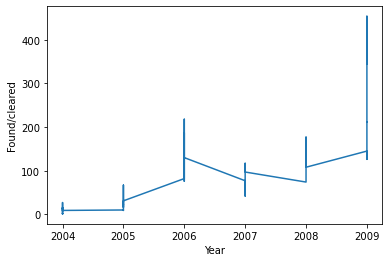

In [119]:
#2.3
y = data['Found/cleared']
x = data['Year']
plt.xlabel('Year')
plt.ylabel('Found/cleared')
plt.plot(x,y)

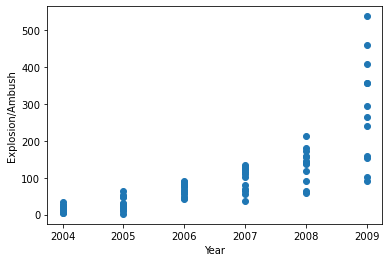

In [120]:
y = data['Explosion/Ambush']
x = data['Year']
plt.xlabel('Year')
plt.ylabel('Explosion/Ambush')
plt.scatter(x,y)

<BarContainer object of 72 artists>

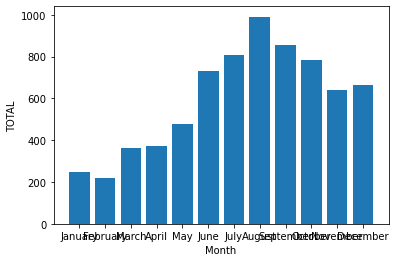

In [122]:
#2.4
y = data['TOTAL']
x = data['Month']
plt.xlabel('Month')
plt.ylabel('TOTAL')
plt.bar(x,y)

## Exercise 2 (3 points) 
<div class="alert alert-block alert-success">
       Exercise 2.1: Read the rivers data
</div>
<div class="alert alert-block alert-success">
       Exercise 2.2: Read the first 5 rows of the rivers dataset
</div>
<div class="alert alert-block alert-success">
       Exercise 2.3: Visualize rivers dataset. 
</div>



In [74]:
#2.1
import pandas as pd
import numpy as np
import rtree
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 

file = '/Users/ptekl/MnM4SDS_Fall2020/lectures/data/rivers.gpkg'
rivers = gpd.read_file(file)

In [108]:
rivers

,dissolve,scalerank,featurecla,name,name_alt,rivernum,note,min_zoom,name_en,min_label,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,0River,1.0,River,Irrawaddy Delta,None,0,None,2.0,Irrawaddy,3.0,...,Irawadi,Rio Irauádi,Иравади,Irrawaddy,İravadi Nehri,Sông Ayeyarwaddy,伊洛瓦底江,2,1159109417,"MULTILINESTRING ((95.45110 17.82050, 95.42766 ..."
1,1001Lake Centerline,9.0,Lake Centerline,Tonle Sap,None,1001,None,7.1,None,8.1,...,Tonle Sap,None,Тонлесап,None,None,None,None,4,1159109429,"MULTILINESTRING ((103.68743 13.22468, 103.7133..."
2,1001River,9.0,River,Tonle Sap,None,1001,None,7.1,None,8.1,...,Tonle Sap,None,Тонлесап,None,None,None,None,4,1159109445,"MULTILINESTRING ((104.61476 12.38203, 104.6176..."
3,1002Lake Centerline,9.0,Lake Centerline,Sheksna,None,1002,None,7.1,Sheksna,8.1,...,Szeksna,None,Шексна,Sjeksna,None,None,舍克斯納河,4,1159109447,"MULTILINESTRING ((37.73951 59.07954, 37.75733 ..."
4,1002River,9.0,River,Sheksna,None,1002,None,7.1,Sheksna,8.1,...,Szeksna,None,Шексна,Sjeksna,None,None,舍克斯納河,4,1159109461,"MULTILINESTRING ((38.47804 59.21666, 38.48528 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,2049Lake Centerline,10.0,Lake Centerline,Ohau,None,2049,None,7.2,Ohau,8.2,...,None,None,None,None,None,None,None,4,1159129657,"MULTILINESTRING ((170.19260 -44.34343, 170.200..."
1451,219River,6.0,River,Po,None,219,Version 4 edit,5.0,Po,6.0,...,Pad,Rio Pó,По,Po,Po Nehri,Sông Po,波河,4,1159129663,"MULTILINESTRING ((7.64746 44.83906, 7.61408 44..."
1452,178River,5.0,River,Loire,None,178000,Changed in 2.0,4.7,Loire,5.7,...,Loara,Rio Loire,Луара,Loire,Loire Nehri,Sông Loire,卢瓦尔河,4,1159129671,GEOMETRYCOLLECTION EMPTY
1453,178River,5.0,River,Loire,None,178,Changed in 4.0,4.7,Loire,5.7,...,Loara,Rio Loire,Луара,Loire,Loire Nehri,Sông Loire,卢瓦尔河,4,1159129677,"MULTILINESTRING ((3.07819 46.98509, 3.07171 46..."


In [92]:
#2.2
rivers.head(5)

,dissolve,scalerank,featurecla,name,name_alt,rivernum,note,min_zoom,name_en,min_label,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,0River,1.0,River,Irrawaddy Delta,None,0,None,2.0,Irrawaddy,3.0,...,Irawadi,Rio Irauádi,Иравади,Irrawaddy,İravadi Nehri,Sông Ayeyarwaddy,伊洛瓦底江,2,1159109417,"MULTILINESTRING ((95.45110 17.82050, 95.42766 ..."
1,1001Lake Centerline,9.0,Lake Centerline,Tonle Sap,None,1001,None,7.1,None,8.1,...,Tonle Sap,None,Тонлесап,None,None,None,None,4,1159109429,"MULTILINESTRING ((103.68743 13.22468, 103.7133..."
2,1001River,9.0,River,Tonle Sap,None,1001,None,7.1,None,8.1,...,Tonle Sap,None,Тонлесап,None,None,None,None,4,1159109445,"MULTILINESTRING ((104.61476 12.38203, 104.6176..."
3,1002Lake Centerline,9.0,Lake Centerline,Sheksna,None,1002,None,7.1,Sheksna,8.1,...,Szeksna,None,Шексна,Sjeksna,None,None,舍克斯納河,4,1159109447,"MULTILINESTRING ((37.73951 59.07954, 37.75733 ..."
4,1002River,9.0,River,Sheksna,None,1002,None,7.1,Sheksna,8.1,...,Szeksna,None,Шексна,Sjeksna,None,None,舍克斯納河,4,1159109461,"MULTILINESTRING ((38.47804 59.21666, 38.48528 ..."


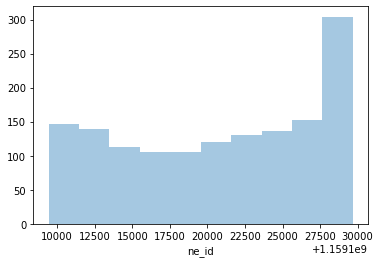

In [118]:
#2.3
_ = sns.distplot(rivers['ne_id'], kde=False)

## Exercise 3 (2 points) 

<div class="alert alert-block alert-success">
       Exercise 3.1: Convert the cities data into EPSG:3395 and plot cities on top of countries data projected into EPSG:3395
</div>

<div class="alert alert-block alert-success">
       Exercise 3.2: Save the projected cities file you created in exercise 2.1 into a file
</div>

In [126]:
#3.1
import pandas as pd
import numpy as np
import rtree
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 

cities = gpd.read_file('/Users/ptekl/MnM4SDS_Fall2020/lectures/data/cities.geojson')

In [127]:
file = '/Users/ptekl/MnM4SDS_Fall2020/lectures/data/countries.gpkg'
countries = gpd.read_file(file)

In [128]:
cities.head()

,name,worldcity,megacity,latitude,longitude,pop_max,pop_min,pop_other,geometry
0,Colonia del Sacramento,0.0,0,-34.479999,-57.840002,21714,21714,0,POINT (-57.84000 -34.48000)
1,Trinidad,0.0,0,-33.543999,-56.900997,21093,21093,0,POINT (-56.90100 -33.54400)
2,Fray Bentos,0.0,0,-33.138999,-58.303997,23279,23279,0,POINT (-58.30400 -33.13900)
3,Canelones,0.0,0,-34.538004,-56.284001,19698,19698,0,POINT (-56.28400 -34.53800)
4,Florida,0.0,0,-34.099002,-56.214998,32234,32234,0,POINT (-56.21500 -34.09900)


In [129]:
countries.head()

,NAME,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,geometry
0,Indonesia,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.51009..."
4,Peru,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


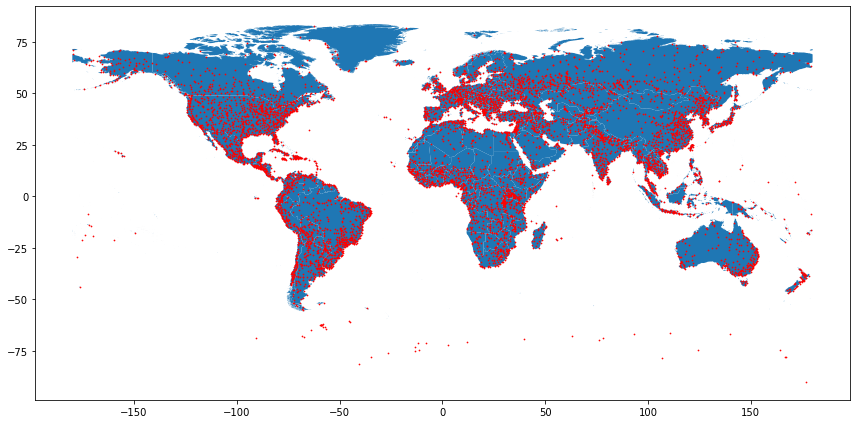

In [130]:
fig, ax = plt.subplots(figsize=(12,12))
countries.plot(ax=ax)
cities.plot(markersize=0.5, color='red',ax=ax)
plt.tight_layout()
plt.show()

In [135]:
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [136]:
cities_projected = cities.to_crs({'init': 'epsg:3395'})

C:\Users\ptekl\miniconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


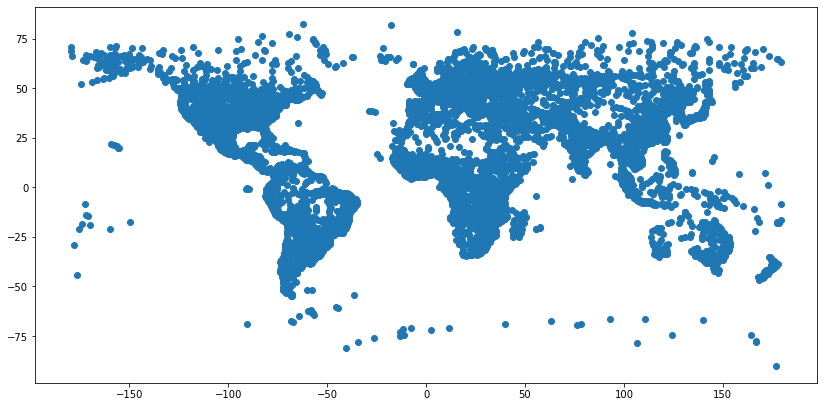

In [137]:
cities.plot(figsize=(14,12));

In [149]:
cities_projected.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - between 80°S and 84°N
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

C:\Users\ptekl\miniconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  


<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - between 80°S and 84°N
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

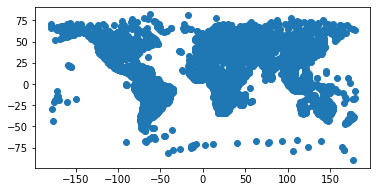

In [151]:
cities = gpd.read_file('/Users/ptekl/MnM4SDS_Fall2020/lectures/data/cities.geojson')
cities = gpd.GeoDataFrame(cities, crs='EPSG:3395')
cities.plot()
cities_projected.crs

In [142]:
#3.2  
shp = '/Users/ptekl/MnM4SDS_Fall2020/lectures/data/cities_epsg3395.shp'
cities_projected.to_file(shp)

## Exercise 4 (7 points)

<div class="alert alert-block alert-success">
       Exercise 4.1: Use cenpy to collect any three variables at the censuss tract geograhy for a city of your choice. 
</div>

<div class="alert alert-block alert-success">
       Exercise 4.2: Check and report the correlation amongst the variables
</div>

<div class="alert alert-block alert-success">
       Exercise 4.3: Use statsmodels to conduct a basic regression on the variables (one as the dependent and two as independent variables). Determine if any are statistically significant. 
</div>

<div class="alert alert-block alert-success">
       Exercise 4.4: Use cenpy to collect county geometries and peform a spatial join with tracts (We want to know which county eaach tract is within). 
</div>

<div class="alert alert-block alert-success">
       Exercise 4.5: Aggregate one of the variables by county and map it. 
</div>

In [12]:
!pip install cenpy

In [62]:
#4.1
import scipy.stats
import statsmodels.api as stm
import cenpy as cp
import numpy as np
import geopandas as gpd
import pandas as pd
from cenpy import products
import matplotlib.pyplot as plt
arlington = products.ACS(2017).from_place('Arlington, VA', level='tract',
                                        variables=['B00002*', 'B01002H_001E','B01002H_003'])
arlington.head()

C:\Users\ptekl\miniconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Matched: Arlington, VA to Arlington CDP within layer Census Designated Places


,GEOID,geometry,B00001_001E,B00002_001E,B01002H_001E,B01002H_003E,state,county,tract
0,51013101300,"POLYGON ((-8587115.390 4704440.090, -8587112.2...",407.0,141.0,35.3,38.9,51,013,101300
1,51013100600,"POLYGON ((-8584437.820 4707011.670, -8584413.3...",321.0,119.0,41.0,41.0,51,013,100600
2,51013102400,"POLYGON ((-8582802.310 4703155.050, -8582789.6...",303.0,146.0,35.1,32.8,51,013,102400
3,51013101703,"POLYGON ((-8580610.100 4705521.790, -8580601.4...",185.0,133.0,39.0,35.7,51,013,101703
4,51013101702,"POLYGON ((-8580536.740 4706391.060, -8580490.2...",256.0,180.0,35.6,35.4,51,013,101702


In [159]:
correlation = np.corrcoef(arlington['B00001_001E'],arlington['B00002_001E'])
scipycorrelation = scipy.stats.pearsonr(arlington['B00001_001E'],arlington['B00002_001E'])
print(correlation)
print(scipycorrelation)

[[1.        0.6455489]
 [0.6455489 1.       ]]
(0.6455489018697341, 9.100719936248572e-06)


In [160]:
cor = stm.OLS(arlington['B00001_001E'],arlington['B00002_001E']).fit()
cor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            B00001_001E   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              705.4
Date:                Thu, 01 Oct 2020   Prob (F-statistic):                    3.83e-26
Time:                        23:44:46   Log-Likelihood:                         -216.81
No. Observations:                  39   AIC:                                      435.6
Df Residuals:                      38   BIC:                                      437.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
B00002_001E     1.9686      0.074     26.559      0.000       1.819       2.119
==============================================================================
Omnibus:                        2.324   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                1.472
Skew:                           0.208   Prob(JB):                        0.479
Kurtosis:                       2.144   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#4.4 
va_county = cp.products.ACS(2017).from_state('VA', level='county')
va_tract = cp.products.ACS(2017).from_state('VA', level='tract', variables = ['B00001_001E'])


C:\Users\ptekl\miniconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\ptekl\miniconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [66]:
#4.5
va_tract_withincounty = gpd.sjoin( va_tract, va_county, how='left')
va_tract_withincounty.head()

countydata = va_tract_withincounty.dissolve(by='county_left', aggfunc='sum')

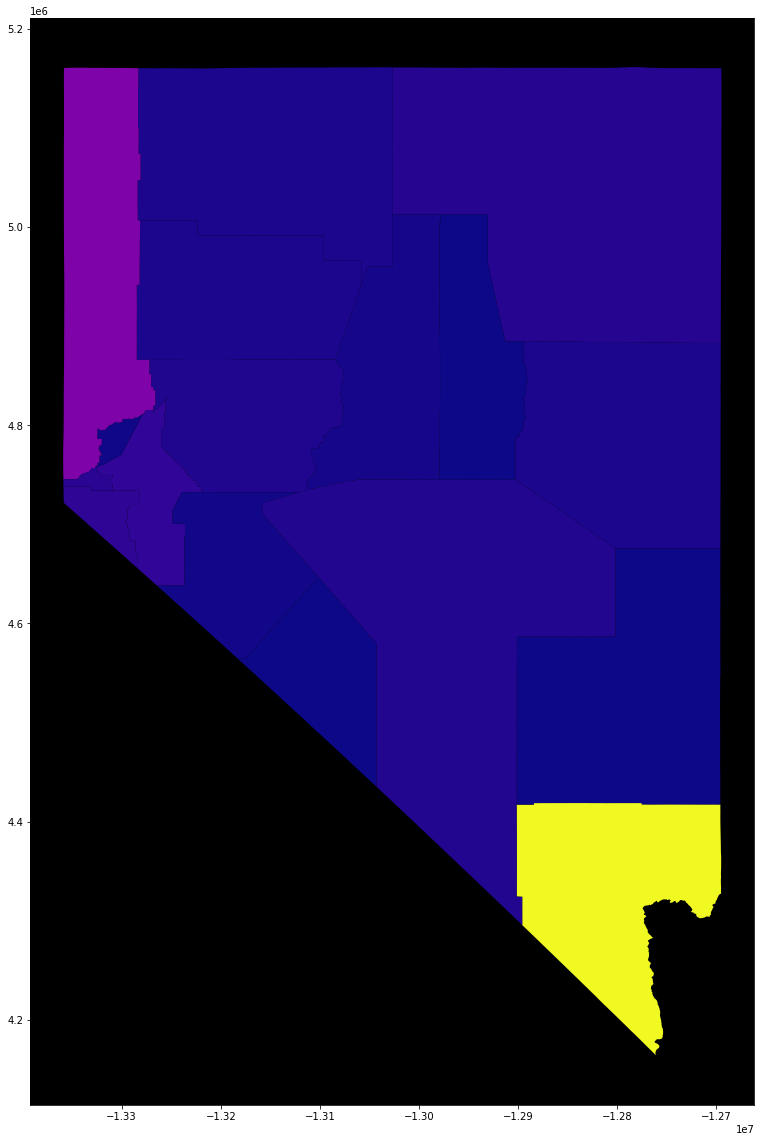

In [69]:
f,ax = plt.subplots(1,1,figsize=(20,20))
countydata.plot('B00001_001E', ax=ax, cmap='plasma', linewidth=0)
ax.set_facecolor('k')

## Exercise 5 (10 points) 

**Read all tasks below before choosing data. This exercise might be useful toward preliminary project ideas.**

<div class="alert alert-block alert-success">
       Exercise 5.1: Collect any three geographic datasets that overlap to at least some degree (at least one must be vector; use at least two different sources of data; at least one must be polygon; two must be automatically collected).
</div>

<div class="alert alert-block alert-success">
       Exercise 5.2: Plot them together on a single map.
</div>

<div class="alert alert-block alert-success">
       Exercise 5.3: Perform a buffer operation on one of your datasets and map the results (use centroids if needed. 
</div>

<div class="alert alert-block alert-success">
       Exercise 5.4: Perform two additional different GIS operationss on your data and map the results of each. 
</div>

<div class="alert alert-block alert-success">
       Exercise 5.5: Perform a join on two of the datasets (spatial or aspatial). One dataset must be the outcome of a GIS operation from exercises 5.3/5.4
</div>

<div class="alert alert-block alert-success">
       Exercise 5.6: Create a new variable for one of the datasets that sums/counts a geographic feature of another dataset (can be original or derivative of previous task).
</div>

<div class="alert alert-block alert-success">
       Exercise 5.7: Create a new variable for one of the datasets that sums/counts an attribute feature of another dataset (can be original or derivative of previous task).
</div>

In [15]:
#5.1  
from cenpy import products
dectest = products.Decennial2010()

C:\Users\ptekl\miniconda3\envs\gds\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [16]:
rv = dectest.from_county('Rockville, MD', level='tract',variables=['^P004'])
cp = dectest.from_csa('College Park', level='tract', variables=['P001001'])
ss, ss_bounds = dectest.from_place('Silver Spring, MD', 
                                     level='tract',
                                     return_bounds=True, 
                                     strict_within=False)

C:\Users\ptekl\miniconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\ptekl\miniconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\ptekl\miniconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, 

Matched: Silver Spring, MD to Silver Spring CDP within layer Census Designated Places


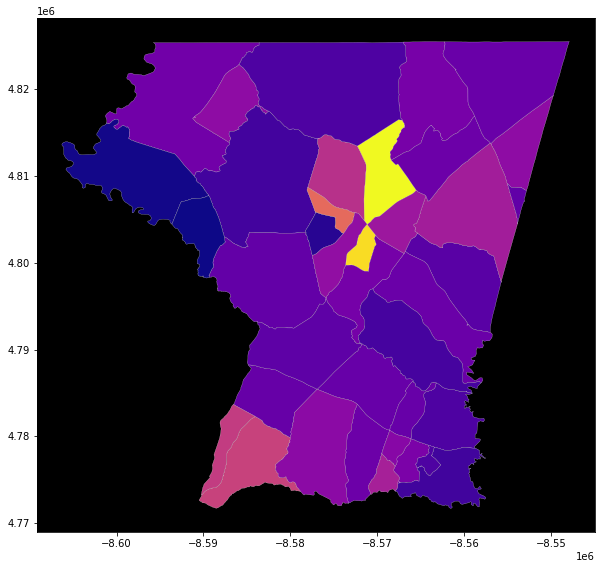

In [164]:
f,ax = plt.subplots(1,1,figsize=(10,10))
rv.plot('P004003', edgecolor='white', cmap='plasma', ax=ax, linewidth=.2)
ax.set_facecolor('k')

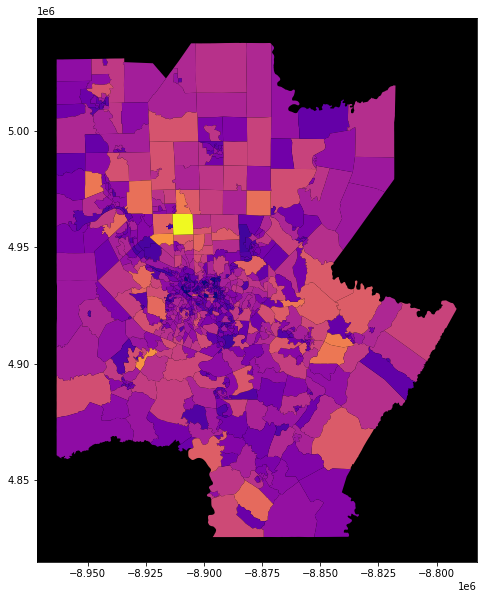

In [166]:
f,ax = plt.subplots(1,1,figsize=(10,10))
cp.plot('P001001', ax=ax, cmap='plasma', linewidth=0)
ax.set_facecolor('k')

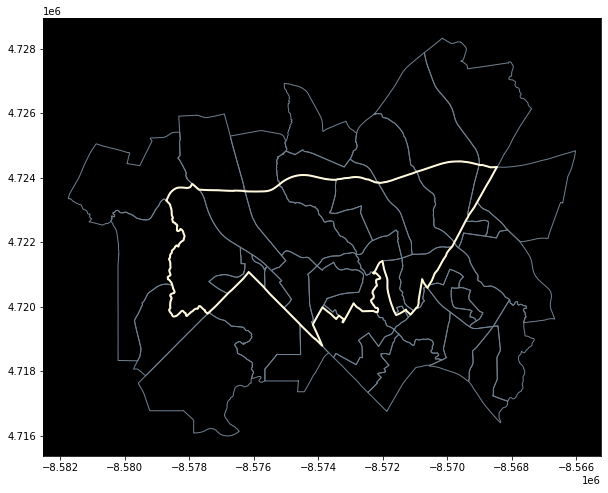

In [168]:
f, ax = plt.subplots(1,1,figsize=(10,10))
ss.plot(edgecolor='slategrey', color='none', ax=ax)
ss_bounds.plot(edgecolor='cornsilk', color='none', ax=ax, linewidth=2)
ax.set_facecolor('k')

<AxesSubplot:>

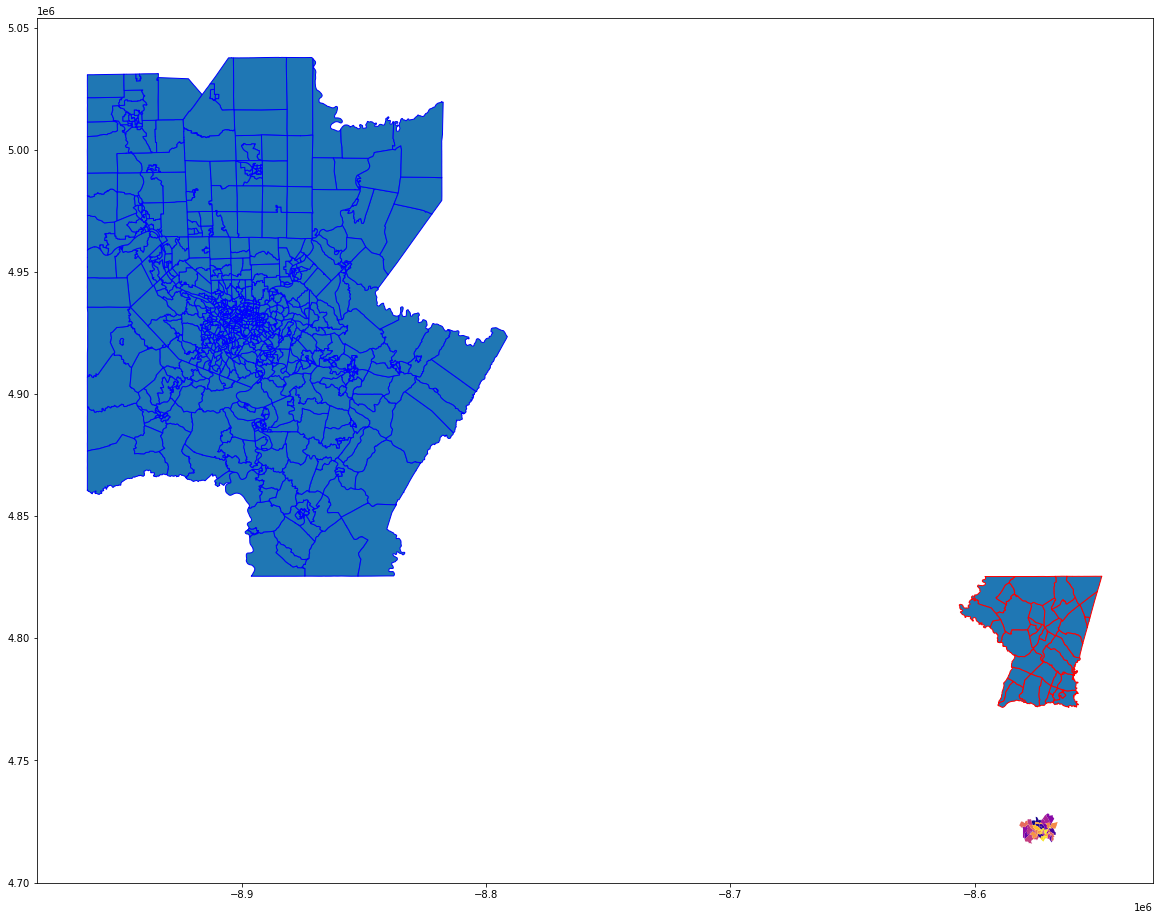

In [109]:
#5.2
f, ax = plt.subplots(1,1,figsize=(20,20))
rv.plot(edgecolor='red', ax=ax)
cp.plot(edgecolor='blue', ax=ax)
ss.plot(ax=ax,cmap="plasma",linewidth=.2)

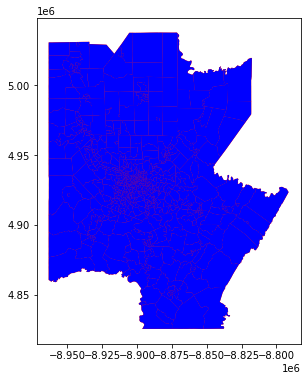

In [30]:
#5.3
import matplotlib.pyplot as plt 
cp_100 = cp.buffer(100)
fig, ax = plt.subplots(figsize=(8,6))
cp_100.plot(ax=ax, color='red')
cp.plot(ax=ax, color='blue');

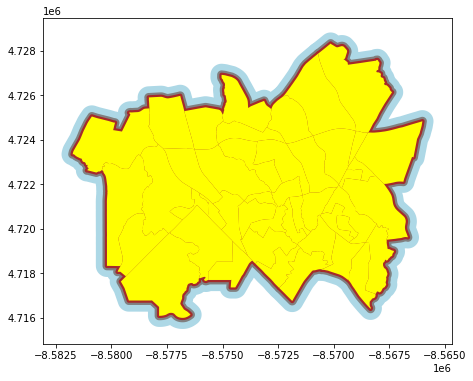

In [25]:
#5.4
ss_100 = ss.buffer(100)
ss_200 = ss.buffer(200)
ss_500 = ss.buffer(500)
fig, ax = plt.subplots(figsize=(8,6))

ss_500.plot(ax=ax, color='lightblue')
ss_200.plot(ax=ax, color='gray')
ss_100.plot(ax=ax, color='brown')
ss.plot(ax=ax, color='Yellow');

In [45]:
#5.5
import cenpy as cp
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
md_city = cp.products.ACS(2017).from_state('MD', level='county')
md_tract = cp.products.ACS(2017).from_state('MD', level='tract', variables = ['B01001A_001E'])

md_tract_withincity = gpd.sjoin( md_tract, md_city, how='left')
md_tract_withincity.head()

citydata = md_tract_withincity.dissolve(by='county_left', aggfunc='sum')

C:\Users\ptekl\miniconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\ptekl\miniconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


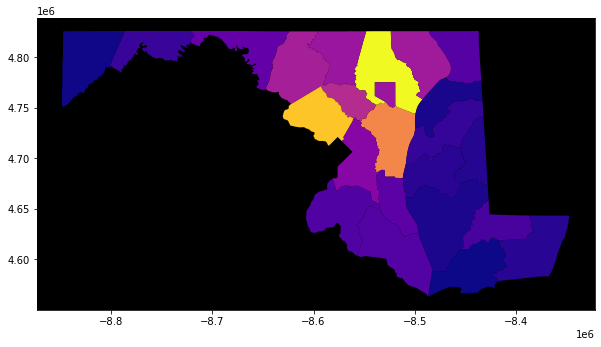

In [46]:
f,ax = plt.subplots(1,1,figsize=(10,10))
citydata.plot('B01001A_001E', ax=ax, cmap='plasma', linewidth=0)
ax.set_facecolor('k')

In [64]:
#5.6
ss['ones'] = 1
ss.head()

,GEOID,geometry,state,county,tract,ones
0,24031703901,"POLYGON ((-8576722.820 4725290.640, -8576591.2...",24,031,703901,1
1,24031703100,"POLYGON ((-8575048.470 4726840.610, -8575046.5...",24,031,703100,1
2,24031702302,"POLYGON ((-8575192.290 4723800.650, -8575097.2...",24,031,702302,1
3,24031701800,"POLYGON ((-8574214.020 4719543.370, -8574140.7...",24,031,701800,1
4,24031702200,"POLYGON ((-8573650.520 4722920.860, -8573630.2...",24,031,702200,1


In [65]:
ss_count = ss["GEOID"].count()
ss_count

44

In [62]:
#5.7
rv.loc['E01006512', 'ones'] = 3
rv.head()

,GEOID,geometry,P004001,P004002,P004003,NAME,state,county,tract,ones
0,24013501002,"POLYGON ((-8601278.460 4816870.870, -8601276.7...",5337.0,5240.0,97.0,"Census Tract 5010.02, Carroll County, Maryland",24,013,501002,NaN
1,24013501001,"POLYGON ((-8591214.620 4816629.680, -8591172.5...",4112.0,3988.0,124.0,"Census Tract 5010.01, Carroll County, Maryland",24,013,501001,NaN
2,24013513002,"POLYGON ((-8590492.820 4772669.750, -8590485.2...",5277.0,5087.0,190.0,"Census Tract 5130.02, Carroll County, Maryland",24,013,513002,NaN
3,24013505203,"POLYGON ((-8568091.780 4776132.890, -8568087.9...",3723.0,3616.0,107.0,"Census Tract 5052.03, Carroll County, Maryland",24,013,505203,NaN
4,24013505102,"POLYGON ((-8566111.740 4779750.510, -8566110.6...",5156.0,5089.0,67.0,"Census Tract 5051.02, Carroll County, Maryland",24,013,505102,NaN


In [66]:
rv_count = rv["GEOID"].count()
rv_count

38

**Save your notebook and make a pull request directed to your branch of the class repository**